# PPG Heart Rate Exercice

Do this exercice as first exercice.

## PPG Signal Processing Exercise Walkthrough

This guide will walk you through the steps necessary to analyze PPG (Photoplethysmography) signals using `neurokit2` and `pandas`. Follow the steps carefully, defining the appropriate variables and applying the recommended functions.

---

### (0. Install the necessary libraries)

Install the necessary libraries if you haven't done so yet.

```python
! pip install neurokit2 plotly joblib
```

---

### 1. Load the Necessary Libraries and Data

Use the loading code as provided. Adjust variable `path` to the correct path 
of the data if you want to use your own data.

---

### 2. Visualize the Raw PPG Data
- Plot all the raw signals available in the dataset.
- Use an appropriate plotting function to visualize the data.
- Add a title to the plot to indicate that this is the raw data.

#### Hints:
- Use `nk.signal_plot()` to plot all signals in the dataset.
- Use `nk.signal_plot?` in a cell to get the documentation of the function.
- Set an appropriate title using `plt.title()`.

---

### 3. Select and Plot a Single PPG Channel
- Choose one channel from the dataset to analyze further.
- Extract the raw values of this selected channel.
- Plot the raw signal from this channel using the correct sampling rate.

#### Hints:
- Store the channel name in a variable (e.g., `ppg_signal = 'PPG Red'`).
- Extract the corresponding column as a NumPy array.
- Use `nk.signal_plot()` with the correct `sampling_rate`.

----

### 4. Clean the PPG Signal
- Apply a cleaning function to remove noise from the PPG signal.
- Plot the cleaned signal for comparison.

#### Hints:
- Use `nk.ppg_clean()` with the appropriate sampling rate.
- Again, use `nk.ppg_clean?` in a cell to get the documentation of the function.
- Store the cleaned signal in a new variable.
- Plot the cleaned signal using `nk.signal_plot()`.

---

### 5. Detect PPG Peaks
- Identify the peaks in the cleaned PPG signal, which correspond to heartbeats.
- Store the detected peaks in a structured format.
- Plot the detected peaks on top of the cleaned signal.

#### Hints:
- Use `nk.ppg_peaks()` on the cleaned signal.
- Again, use `nk.ppg_peaks?` in a cell to get the documentation of the function.
- Use the argument `method='bishop'` for proper peak detection.
- Store the detected peaks in a dictionary or DataFrame.
- `nk.ppg_peaks()` has a `show` parameter. Use it to plot the peaks on top of the signal.

---

### 6. Compute Heart Rate from PPG
- Extract heart rate values from the detected peaks.
- Compute the instantaneous heart rate using the correct function.
- Plot the computed heart rate over time.

#### Hints:
- Use `nk.ecg_rate()` with the detected peaks.
- Store the heart rate values in a new variable.

---

### 7. Analyze Heart Rate Data
- Calculate statistics of the heart rate values (mean, std, min, max)
- Please note down the mean heart rate. We will compare it in the next lecture








In [ ]:
#! pip install neurokit2 plotly joblib

In [1]:
import helpers as hp
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

# Set global figure size
plt.rcParams["figure.figsize"] = (12, 4)

srate = 25 # EmotiBit PPG sampling rate

path = 'example_data'
ppg_data = hp.load_emotibit_ppg(path)
ppg_data.head()


,PPG Green,PPG Infrared,PPG Red
2024-03-03 19:51:04.380907059,9743.0,160363.0,152966.0
2024-03-03 19:51:04.420907021,9743.0,160150.0,152851.0
2024-03-03 19:51:04.460907936,9638.0,159320.0,152482.0
2024-03-03 19:51:04.500907898,9434.0,158531.0,152110.0
2024-03-03 19:51:04.540909052,9238.0,158171.0,151934.0


Text(0.5, 1.0, 'Raw PGG signals')

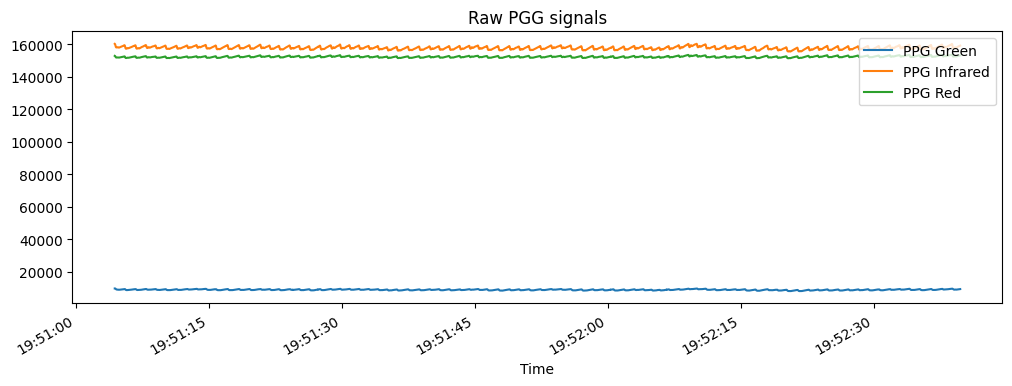

In [2]:
# plot all raw data with neurokit2
nk.signal_plot(ppg_data)
plt.title('Raw PGG signals')


Text(0.5, 1.0, 'Raw PGG signal')

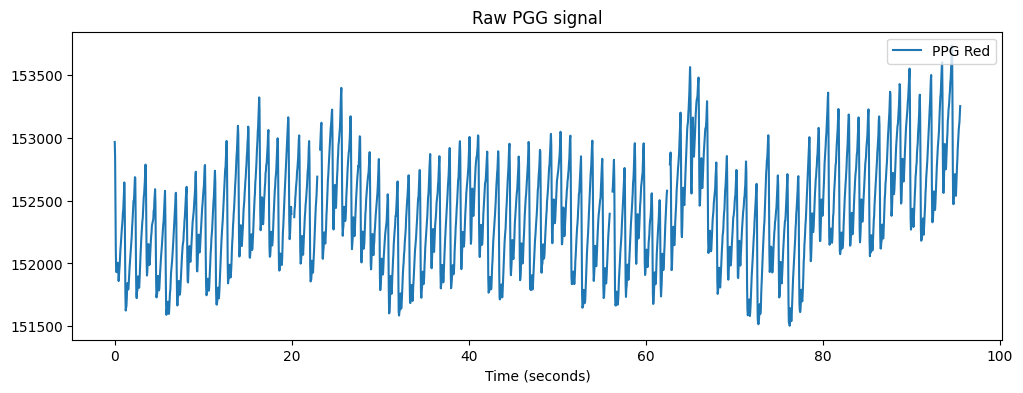

In [3]:
# select on channel a plot raw data of this channel
ppg_signal = 'PPG Red'
ppg_raw = ppg_data[ppg_signal].values
nk.signal_plot(ppg_raw, sampling_rate=srate, labels=ppg_signal)
plt.title('Raw PGG signal')

c:\VSCode\BiSeIm\.venv\Lib\site-packages\neurokit2\ppg\ppg_clean.py:73: NeuroKitWarning: There are 16 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(


Text(0.5, 1.0, 'Clean PPG signal')

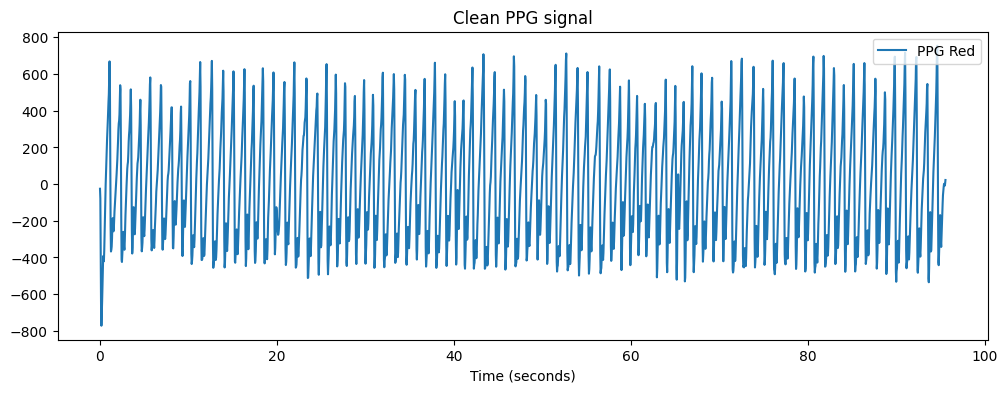

In [4]:
# calculate clean signals
ppg_clean = nk.ppg_clean(ppg_raw, sampling_rate=srate)
nk.signal_plot(ppg_clean, sampling_rate=srate, labels=ppg_signal)
plt.title('Clean PPG signal')


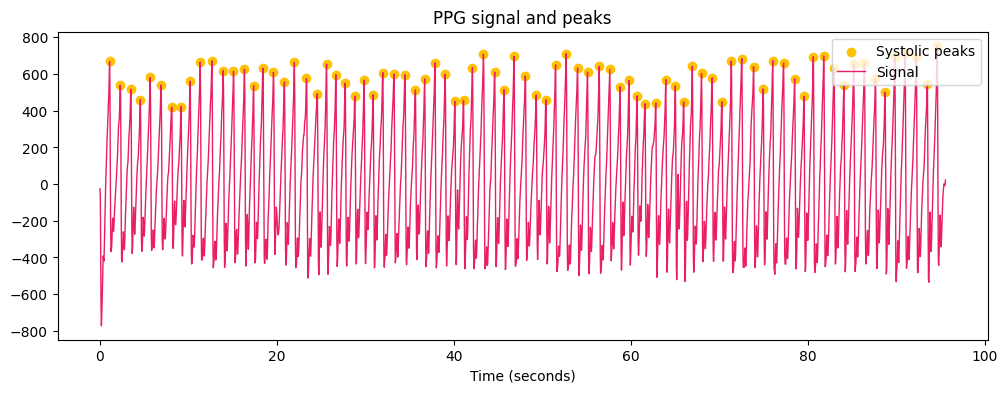

In [5]:
# detect peaks and show them
peaks = nk.ppg_peaks(ppg_clean,sampling_rate=srate, method='bishop', show=True)

In [6]:
# calculate heart rate
heart_rate = nk.ecg_rate(peaks, sampling_rate=srate)
heart_rate

array([52.60906758, 50.        , 50.        , 55.55555556, 53.57142857,
       50.        , 50.        , 55.55555556, 57.69230769, 53.57142857,
       45.45454545, 46.875     , 51.72413793, 48.38709677, 57.69230769,
       57.69230769, 50.        , 48.38709677, 53.57142857, 44.11764706,
       48.38709677, 57.69230769, 57.69230769, 57.69230769, 53.57142857,
       57.69230769, 60.        , 53.57142857, 48.38709677, 48.38709677,
       50.        , 57.69230769, 51.72413793, 51.72413793, 55.55555556,
       60.        , 60.        , 48.38709677, 46.875     , 57.69230769,
       53.57142857, 46.875     , 48.38709677, 55.55555556, 53.57142857,
       50.        , 46.875     , 53.57142857, 45.45454545, 50.        ,
       51.72413793, 60.        , 65.2173913 , 68.18181818, 48.38709677,
       53.57142857, 55.55555556, 62.5       , 62.5       , 57.69230769,
       50.        , 55.55555556, 55.55555556, 50.        , 45.45454545,
       55.55555556, 55.55555556, 48.38709677, 48.38709677, 57.69

In [7]:
# calculate statistics of heart rate
pd.Series(heart_rate).describe()


count    83.000000
mean     53.020889
std       4.785223
min      44.117647
25%      49.193548
50%      53.571429
75%      55.555556
max      68.181818
dtype: float64

## Solution in one go

NeuroKit2 has a built-in function to perform all steps in one go. You find it below. Please feel free to use it as a reference.

In [8]:
# Extract the red PPG data
ppg_red = ppg_data['PPG Green']

# Process the PPG signal using NeuroKit2
signals, info = nk.ppg_process(ppg_red, sampling_rate=srate, method_peaks='bishop')

# Plot the processed PPG signal
plt.figure(figsize=(18, 8))
fig = nk.ppg_plot(signals, info,static=False)

# Modify the figure size
fig.update_layout(
    width=1000,  # Set width in pixels
    height=600,  # Set height in pixels
    title="Customized PPG Plot"
)

fig.show()

c:\VSCode\BiSeIm\.venv\Lib\site-packages\neurokit2\ppg\ppg_clean.py:73: NeuroKitWarning: There are 16 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(


<Figure size 1800x800 with 0 Axes>